# DSP I - Exemplos 1B (Sistemas digitais)

## Bibliotecas

In [6]:
import numpy as np

def impseq(n0,n1,n2):

    #      Generates x(n) = delta(n-n0); n1 <= n <= n2
    #      ----------------------------------------------
    #      [x,n] = impseq(n0,n1,n2)
    #

    n=np.array(range(n1,n2+1))
    x = n-n0
    for i in range(len(x)):
        if x[i]!=0: x[i]=0
        else: x[i]=1
    #x = (n-n0) == 0
    return [x,n]

def stepseq(n0,n1,n2):
    #     Generates x(n) = u(n-n0); n1 <= n <= n2
    #     ------------------------------------------
    #     [x,n] = stepseq(n0,n1,n2)
    #
    n=np.arange(n1,n2+1)
    x = n-n0
    for i in range(len(x)):
        if x[i]<0: x[i]=0
        else: x[i]=1
    #x = [(n-n0) >= 0]
    return [x,n]

def  sigadd(x1,n1,x2,n2):
    # % implements y(n) = x1(n)+x2(n)
    # % -----------------------------
    # % [y,n] = sigadd(x1,n1,x2,n2)
    # % y = sum sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # % x2 = second sequence over n2 (n2 can be different from n1)
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1+y2;
    return [y,n]


def  sigmult(x1,n1,x2,n2):
    # % implements y(n) = x1(n)*x2(n)
    # % -----------------------------
    # % [y,n] = sigmult(x1,n1,x2,n2)
    # % y = product sequence over n, which includes n1 and n2
    # % x1 = first sequence over n1
    # %
    n = np.arange(min(n1.min(0),n2.min(0)),max(n1.max(0),n2.max(0))+1) # duration of y(n)
    y1 = np.zeros((1,len(n)))  #initialization
    y1=y1[0,:]
    y2 = y1.copy()
    y1[np.nonzero(np.logical_and((n>=n1.min(0)),(n<=n1.max(0)))==1)]=x1.copy()
    y2[np.nonzero(np.logical_and((n>=n2.min(0)),(n<=n2.max(0)))==1)]=x2.copy()
    y = y1*y2
    return [y,n]


def sigshift(x,m,k):
    # % implements y(n) = x(n-k)
    # % -------------------------
    # % [y,n] = sigshift(x,m,k)
    # %
    n = m+k
    y = x.copy()
    return [y,n]


def sigfold(x,n):
    # % implements y(n) = x(-n)
    # % -----------------------
    # % [y,n] = sigfold(x,n)
    # %
    y = np.flip(x)
    n = -np.flip(n)
    return [y,n]

def conv_m(x,nx,h,nh):
    # Modified convolution routine for signal processing
    # --------------------------------------------------
    # [y,ny] = conv_m(x,nx,h,nh)
    # [y,ny] = convolution result
    # [x,nx] = first signal
    # [h,nh] = second signal
    #
    nyb = nx[0]+nh[0]
    nye = nx[len(x)-1] + nh[len(h)-1]
    ny = np.arange(nyb,nye+1)
    y = np.convolve(x,h)
    return [y,ny]



## Indicação de Linearidade e de Invariância no tempo para sistemas digitais

In [7]:
#Teste numérico que indica a linearidade de um sistema

# from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np

n=np.array(range(101))
x1=np.random.rand(len(n))
x2=np.sqrt(10)*np.random.randn(len(n))

# sistema sob teste: y[n] = x[n]*u[n]

[u,n]=stepseq(0,0,100)
y1=x1*u
y2=x2*u

a=5                     # constante a
b=10                    # constante b
y=(a*x1+b*x2)*u

# verificar se é igual a a.y1 + b.y2, descontando erros numéricos
diff = sum (abs(y - (a*y1 + b*y2)))

if diff < 1e-5:
    print(' **** Sistema é linear ***')
else:
    print(' **** Sistema não é linear ***')

 **** Sistema é linear ***


In [8]:
# Teste numérico que indica a invariancia ao tempo de um sistema

# from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold
import numpy as np

nx=np.array(range(101))
x=np.sqrt(10)*np.random.randn(len(nx))

# sistema sob teste: y[n] = x[n]*u[n]
delay = 1                       # atraso
[u,nu] = stepseq(0,0,100)
y = x*u
[y1,ny1] = sigshift(y,nx,delay) #y[n-delay]

[x1,nx1] = sigshift(x,nx,delay) #x[n-delay]
[y2,ny2] = sigmult(x1,nx1,u,nu) #T{x[n-delay]}

[diff,ndiff]=sigadd(y1,ny1,-y2,ny2)
vdiff=sum(abs(diff))

if vdiff < 1e-5:
    print(' **** Sistema é Invariante no Tempo ***')
else:
    print(' **** Sistema não é Invariante no Tempo ***')

 **** Sistema não é Invariante no Tempo ***


## Exemplo de convolução entre 2 sequências

(-5.0, 50.0, 0.0, 8.0)

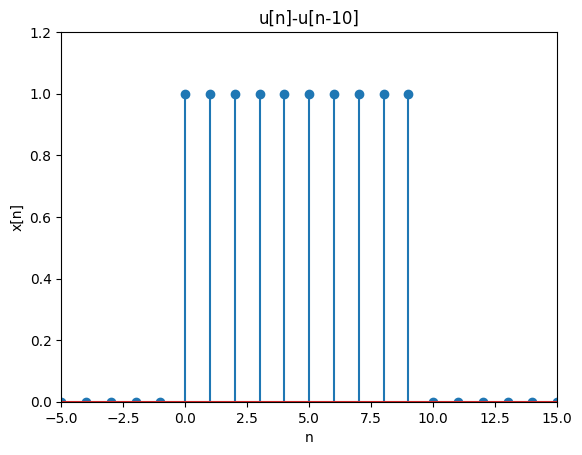

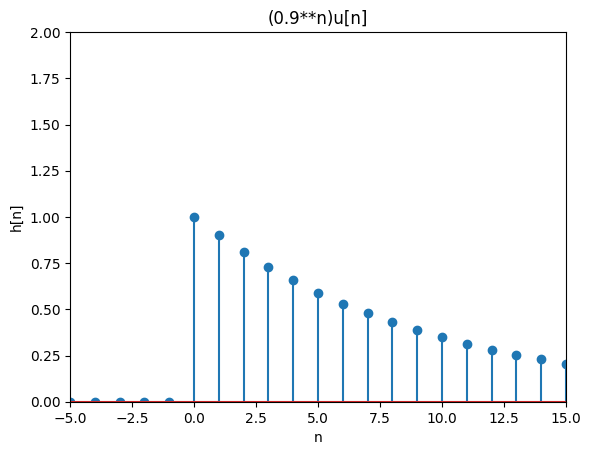

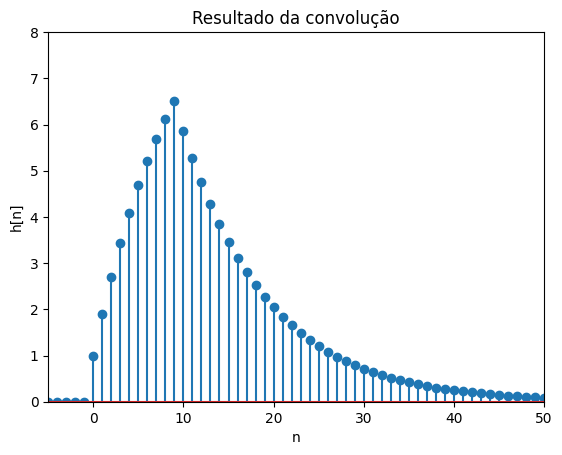

In [9]:
import matplotlib.pyplot as plt
#from fDSP import impseq,stepseq,sigadd,sigmult,sigshift,sigfold,conv_m
import numpy as np

# x[n] = u[n] - u[n-10]
# h[n] = (0.9^n)u[n]

[x1,n]=stepseq(0,-5,50)
[x2,n]=stepseq(10,-5,50)
[x,n] =sigadd(x1,n,-x2,n)

h1=0.9**n
[h,n] = sigmult(h1,n,x1,n)

[y,nn]=conv_m(x,n,h,n)

plt.figure()
plt.title("u[n]-u[n-10]")
plt.stem(n,x)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.axis([-5, 15, 0 ,1.2])

plt.figure()
plt.title("(0.9**n)u[n]")
plt.stem(n,h)
plt.xlabel("n")
plt.ylabel("h[n]")
plt.axis([-5, 15, 0 ,2])

plt.figure()
plt.title("Resultado da convolução")
plt.stem(nn,y)
plt.xlabel("n")
plt.ylabel("h[n]")
plt.axis([-5, 50, 0 ,8])

## Exemplo 2.11 - Cálculo de respostas de sistemas descritos por Equação de diferenças

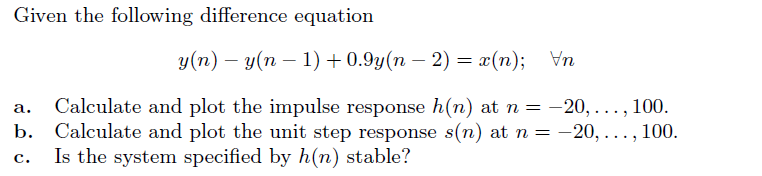

Sistema estável, pois:
- Somatório da resposta do impulso converge para o valor: 14.878536688007543
- Os polos do sistema estão dentro do circulo de raio unitário (plano Z): [0.9486833 0.9486833]


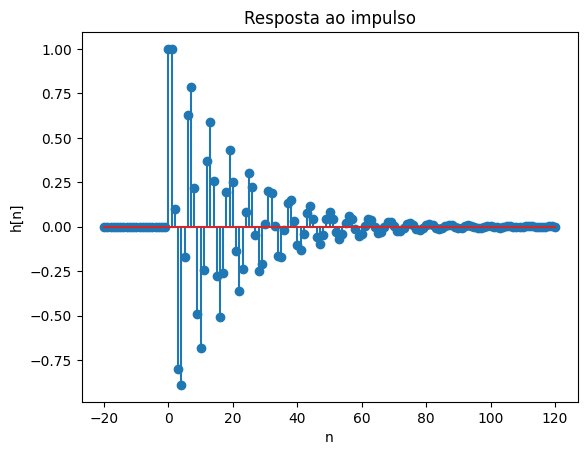

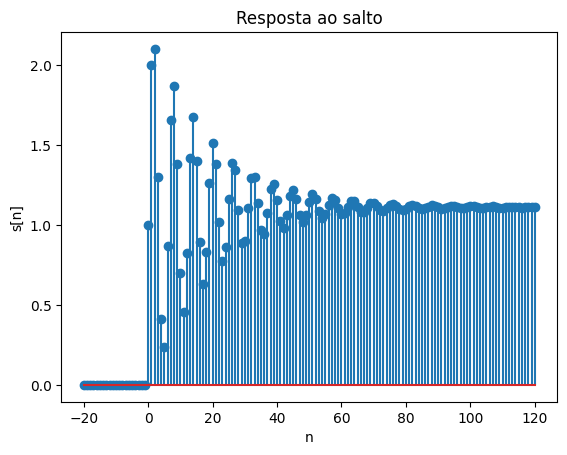

In [10]:
import matplotlib.pyplot as plt
#from fDSP import impseq, stepseq, sigadd, sigmult, sigshift, sigfold, conv_m
import numpy as np
from scipy import signal

# exemplo 2.11

a = np.array([1, -1, 0.9])
b = np.array([1])
[x, n] = impseq(0, -20, 120)
h = signal.lfilter(b, a, x)
plt.figure()
plt.stem(n, h)
plt.title("Resposta ao impulso")
plt.xlabel("n")
plt.ylabel("h[n]")

[x, n] = stepseq(0, -20, 120)
s = signal.lfilter(b, a, x)
plt.figure()
plt.title("Resposta ao salto")
plt.xlabel("n")
plt.ylabel("s[n]")
plt.stem(n, s)

print("Sistema estável, pois:")
print("- Somatório da resposta do impulso converge para o valor:",sum(abs(h)))

z = np.roots(a)
print("- Os polos do sistema estão dentro do circulo de raio unitário (plano Z):", abs(z))
